# Cellular Automata Simulation

Using various update rules, complicated phenomena emerges from iterations.

## Exercise 1, 1D automata and traffic simulation

rule184 has the binary code: ```10111000```

In [1]:
rule = bitstring(UInt8(184))
# parse(Int,rule,base = 2)

"10111000"

In [2]:
# v= [1,0,1,1,1,0,0,0]
# @time reduce((x,y)->x<<1+y, v; init=0)

# neighbourhood = [0,1,0]
# neighbourhood = reduce((x,y)->x<<1+y, neighbourhood; init=0)
# rule_neigh = parse(Int,rule[neighbourhood+1])
using Plots

function getRule(ruleNum::Int)
    return bitstring(UInt8(ruleNum))
end

function queryRule(rule, neighbourhood)
    neighbourhood = reduce((x,y)->x<<1+y, neighbourhood; init=0)
    return parse(Int,rule[8-neighbourhood])
end

function evolveDirichlet(rule, state)
    new_state = copy(state)
    for i in 2:length(state)-1
        new_state[i] = queryRule(rule, state[i-1:i+1])
    end
    return new_state
end

function evolvePeriodic(rule, state)
    new_state = copy(state)
    for i in 1:length(state)
        neighbourState = [state[mod1(i-1,length(state))], state[i], state[mod1(i+1,length(state))]]
        new_state[i] = queryRule(rule, neighbourState)
    end
    return new_state
end

# plot the state in color black and white squares

function plotState(state)
    n = length(state)
    plot(1:n, [state zeros(Int, n)], seriestype = :bar, color = [:black :white], legend = false, grid = false, xticks = false, yticks = false,xaxis=false,yaxis=false,size=(500,50))
end

plotState (generic function with 1 method)

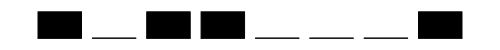

In [3]:
plotState([1,0,1,1,0,0,0,1])

## Rule 184
traffic simulation. the elements are traveling rightwards.

With the Dirichlet boundary, the boundary 0 is fixed to be an endpoint of car drain. the boundary of 1 is fixed to be a start point of car influx.

The ```1010...``` pattern is the most stable propagating pattern and will eventually happen i Dirichlet if the end isn't clogged.

In Periodic, if the number of cars exceeds half of number of slots, the clog happens.

In [4]:
rule = getRule(184)
init = [1,0,0,0,0,0,0,1,1,1,0,0,0,1,0]
for _ in 1:10
    init = evolveDirichlet(rule, init)
    println(init)
end

[1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0]
[1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]
[1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]
[1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0]
[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]
[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]
[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0]
[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0]


In [5]:
rule = getRule(184)
init = [1,0,0,0,0,0,0,1,1,1,0,0,0,1,0]
for _ in 1:10
    init = evolvePeriodic(rule, init)
    println(init)
end

[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1]
[1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]
[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1]
[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]
[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1]
[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0]
[0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1]
[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]


In [6]:
rule = getRule(184)
init = [1,0,1,0,1,1,0,1,1,1,0,1,0,1,0]
for _ in 1:10
    init = evolvePeriodic(rule, init)
    println(init)
end

[0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1]
[1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0]
[0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1]
[1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
[1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
[0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
[1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0]
[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]
[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1]
[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1]


In [7]:
# Function to compute the next state of a 1D cellular automaton with Rule 184
# function rule184(state::Vector{Int}, steps::Int)
#     # Define the rule for each 3-bit neighborhood configuration
#     rule = Dict(
#         (1, 1, 1) => 1,
#         (1, 1, 0) => 0,
#         (1, 0, 1) => 1,
#         (1, 0, 0) => 1,
#         (0, 1, 1) => 1,
#         (0, 1, 0) => 1,
#         (0, 0, 1) => 0,
#         (0, 0, 0) => 0
#     )
    
#     # Run the automaton for the specified number of steps
#     for _ in 1:steps
#         # Create a new state to store the next generation
#         new_state = copy(state)
#         for i in 2:length(state)-1  # Avoid the boundaries for simplicity
#             neighborhood = (state[i-1], state[i], state[i+1])
#             new_state[i] = rule[neighborhood]
#         end
#         # Update state for the next iteration
#         state = copy(new_state)
#         write(stdout, join(state, " "), "\n")
#     end
# end


# initial_state = [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]
# steps = 10
# rule184(initial_state, steps)

[ Info: Saved animation to /home/zgd/projects/GithubRepos/myExploration/computationalPhysicsCourses/ex06/rule184_2.gif


Plots.AnimatedGif("/home/zgd/projects/GithubRepos/myExploration/computationalPhysicsCourses/ex06/rule184_2.gif")
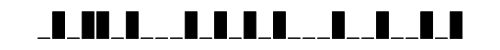

In [8]:

init = [1,0,1,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1]

rule184_gif = @animate for i in 1:40
    global init
    init = evolvePeriodic(getRule(184), init)
    plotState(init)
end

gif(rule184_gif, "rule184_2.gif", fps = 8)

00011110


[ Info: Saved animation to /home/zgd/projects/GithubRepos/myExploration/computationalPhysicsCourses/ex06/rule30.gif


Plots.AnimatedGif("/home/zgd/projects/GithubRepos/myExploration/computationalPhysicsCourses/ex06/rule30.gif")
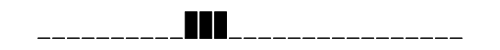

In [9]:
init = [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]


# change rule to 110
println(getRule(30))
rule_gif = @animate for i in 1:40
    global init
    init = evolvePeriodic(getRule(30), init)
    plotState(init)
end

# rule184_gif = @animate for i in 1:40
#     global init
#     init = evolvePeriodic(getRule(184), init)
#     plotState(init)
# end

gif(rule_gif, "rule30.gif", fps = 8)

## Game of Life

Rules:

- any live lattice with fewer than 2 neighbours die
- any live cell with 2,3 neighbours live
- any live lattice with more than 3 neighbours die
- any dead cell with 3 live cells live


In [79]:
function neighbourhood2dPeriodic(state, i, j)
    n = size(state, 1)
    m = size(state, 2)
    return [state[i,j],state[mod1(i-1,n), mod1(j-1,m)], state[mod1(i-1,n), j], state[mod1(i-1,n), mod1(j+1,m)], state[i, mod1(j-1,m)], state[i, mod1(j+1,m)], state[mod1(i+1,n), mod1(j-1,m)], state[mod1(i+1,n), j], state[mod1(i+1,n), mod1(j+1,m)]]
end

function queryRule2d(neighbour_states)
    stateself = neighbour_states[1]
    sumNeighbour = sum(neighbour_states[2:end])
    if stateself == 1
        if sumNeighbour == 2 || sumNeighbour == 3
            return 1
        else
            return 0
        end
    else
        if sumNeighbour == 3
            return 1
        else
            return 0
        end
    end
end

function evolve2dPeriodic(state)
    new_state = copy(state)
    n = size(state, 1)
    m = size(state, 2)
    for i in 1:n
        for j in 1:m
            neighbourState = neighbourhood2dPeriodic(state, i, j)
            new_state[i, j] = queryRule2d(neighbourState)
        end
    end
    return new_state
end

function generateInitialStateRandom(n, m)
    return rand([0,1], (n, m))
end

function generateInitialStateCustom(n,m,ptlist)
    state = zeros(Int, n, m)
    for pt in ptlist
        state[pt[1], pt[2]] = 1
    end
    return state
end

function plotState2d(state)
    heatmap(state, c = c=reverse(cgrad(:grays)), colorbar = false, axis = nothing, size = (500, 500))
end

plotState2d (generic function with 1 method)

[ Info: Saved animation to /home/zgd/projects/GithubRepos/myExploration/computationalPhysicsCourses/ex06/gameofLifePeriodicRandomStart.gif


Plots.AnimatedGif("/home/zgd/projects/GithubRepos/myExploration/computationalPhysicsCourses/ex06/gameofLifePeriodicRandomStart.gif")
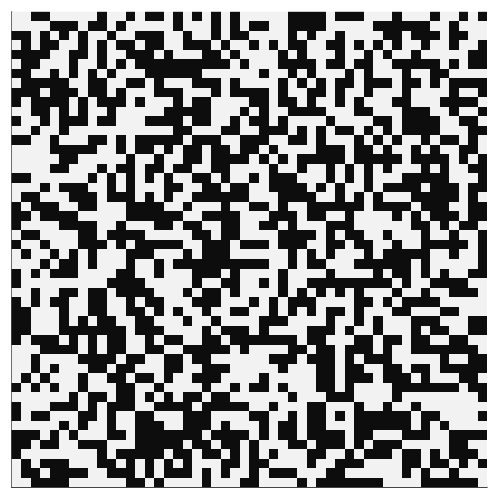

In [85]:
state = generateInitialStateRandom(50, 50)

neighbours = neighbourhood2dPeriodic(state, 25, 25)
queryRule2d(neighbours)

life_gif = @animate for i in 1:100
    global state
    plotState2d(state)
    state = evolve2dPeriodic(state)
end

gif(life_gif, "gameofLifePeriodicRandomStart.gif", fps = 10)

[ Info: Saved animation to /home/zgd/projects/GithubRepos/myExploration/computationalPhysicsCourses/ex06/gameofLifePeriodicPentominoStart.gif


Plots.AnimatedGif("/home/zgd/projects/GithubRepos/myExploration/computationalPhysicsCourses/ex06/gameofLifePeriodicPentominoStart.gif")
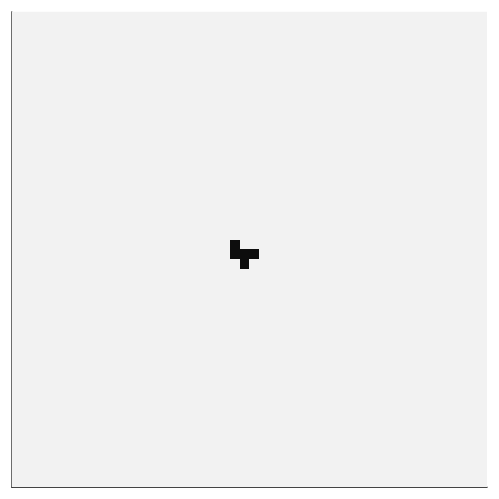

In [88]:
live_list = 
    [
        (25, 25), 
        (25, 26), 
        (24, 25),  
        (25, 24), 
        (26, 24)
    ]

state = generateInitialStateCustom(50, 50, live_list)

neighbours = neighbourhood2dPeriodic(state, 25, 25)
queryRule2d(neighbours)

life_gif = @animate for i in 1:100
    global state
    plotState2d(state)
    state = evolve2dPeriodic(state)
end

gif(life_gif, "gameofLifePeriodicPentominoStart.gif", fps = 10)

[ Info: Saved animation to /home/zgd/projects/GithubRepos/myExploration/computationalPhysicsCourses/ex06/gameofLifePeriodicSpaceshipStart.gif


Plots.AnimatedGif("/home/zgd/projects/GithubRepos/myExploration/computationalPhysicsCourses/ex06/gameofLifePeriodicSpaceshipStart.gif")
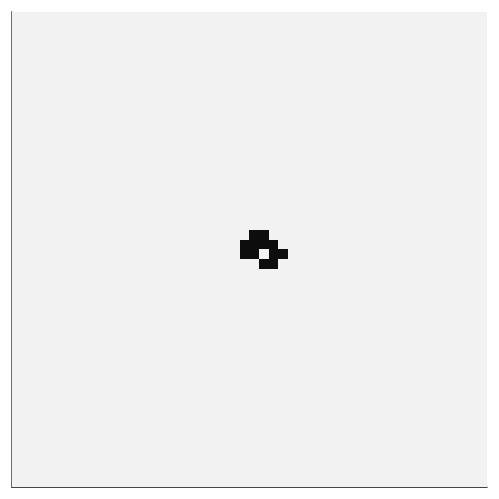

In [ ]:
# This one is called light weight spaceship
live_list = 
    [
        (25, 25), 
        (25, 26), 
        (25, 28),  
        (25, 29), 
        (24, 27),
        (24, 28),
        (26, 25),
        (26, 26),
        (26, 27),
        (26, 28),
        (27, 26),
        (27, 27)
    ]

state = generateInitialStateCustom(50, 50, live_list)

neighbours = neighbourhood2dPeriodic(state, 25, 25)
queryRule2d(neighbours)

life_gif = @animate for i in 1:100
    global state
    plotState2d(state)
    state = evolve2dPeriodic(state)
end

gif(life_gif, "gameofLifePeriodicSpaceshipStart.gif", fps = 10)

[ Info: Saved animation to /home/zgd/projects/GithubRepos/myExploration/computationalPhysicsCourses/ex06/gameofLifePeriodicGliderStart.gif


Plots.AnimatedGif("/home/zgd/projects/GithubRepos/myExploration/computationalPhysicsCourses/ex06/gameofLifePeriodicGliderStart.gif")
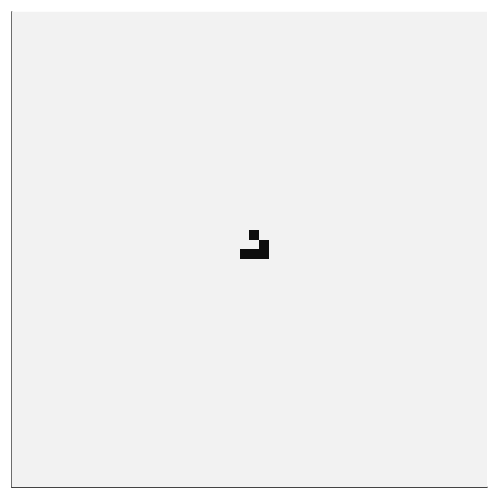

In [ ]:
# This one is called glider
live_list = 
    [
        (25, 25), 
        (25, 26), 
        (25, 27),  
        (26, 27),
        (27, 26)
    ]

state = generateInitialStateCustom(50, 50, live_list)

neighbours = neighbourhood2dPeriodic(state, 25, 25)
queryRule2d(neighbours)

life_gif = @animate for i in 1:100
    global state
    plotState2d(state)
    state = evolve2dPeriodic(state)
end

gif(life_gif, "gameofLifePeriodicGliderStart.gif", fps = 10)

[ Info: Saved animation to /home/zgd/projects/GithubRepos/myExploration/computationalPhysicsCourses/ex06/gameofLifePeriodicPentominoStart_long.gif


Plots.AnimatedGif("/home/zgd/projects/GithubRepos/myExploration/computationalPhysicsCourses/ex06/gameofLifePeriodicPentominoStart_long.gif")
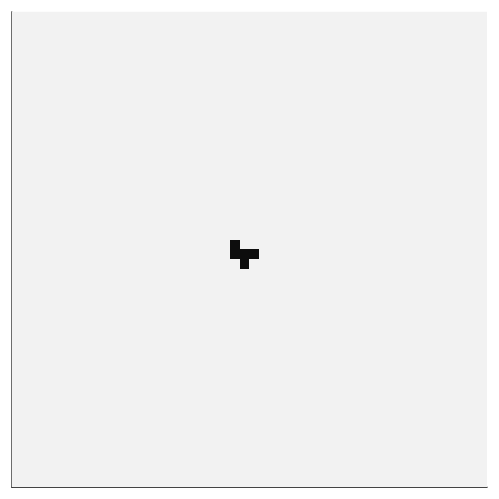

In [ ]:
# this one is called R-pentomino, which is a methuselah
live_list = 
    [
        (25, 25), 
        (25, 26), 
        (24, 25),  
        (25, 24), 
        (26, 24)
    ]

state = generateInitialStateCustom(50, 50, live_list)

neighbours = neighbourhood2dPeriodic(state, 25, 25)
queryRule2d(neighbours)

life_gif = @animate for i in 1:500
    global state
    plotState2d(state)
    state = evolve2dPeriodic(state)
end

gif(life_gif, "gameofLifePeriodicPentominoStart_long.gif", fps = 50)